In [ ]:
!pip install spectral-cube
!pip install pvextractor 
!pip install aplpy
import matplotlib.pyplot as plt
import numpy as np
from scipy import*
import scipy.ndimage as nd
import matplotlib 
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from scipy import stats
import aplpy
from matplotlib import*
from astropy.convolution import Kernel1D
#from astropy.convolution import Box1DKernela
from astropy import units as u
from astropy.io import fits
from spectral_cube import SpectralCube
from spectral_cube import* # SpectralCube 
from spectral_cube import Projection 
import scipy.ndimage as nd
from pvextractor import extract_pv_slice
from pvextractor import Path
from scipy import optimize

from sympy import nsolve
from scipy.optimize import fsolve 
from scipy.constants import*
from astropy import constants as con
from astropy import units as u
#import matplotlib.mlab as mlab
from astropy.convolution import Kernel1D
from astropy.table import Table
from astropy.wcs import WCS
from astropy.wcs import utils 
from astropy.wcs.utils import pixel_to_skycoord
from astropy.wcs.utils import skycoord_to_pixel
from astropy.table import QTable
#from yt.mods import ColorTransferFunction, write_bitmap
#from astropy import yt
import warnings
from astropy.io import fits
import pandas as pd
import seaborn as sns
from astropy.table import vstack, hstack, join

from astropy import units as u
from astropy.visualization.wcsaxes import Quadrangle

# Import DataSci packages and classes >>>>>>>>>>>>>>>>>>

import pandas as pd
import numpy as np

# We'll use this later
from numpy import meshgrid

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# This is new, it will allow us to interact with
# 3d plots in the notebook
from mpl_toolkits.mplot3d import Axes3D

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor as gbreg 

     |████████████████████████████████| 218 kB 15.7 MB/s 
     |████████████████████████████████| 73 kB 1.3 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 89 kB 5.4 MB/s 
     |████████████████████████████████| 1.1 MB 45.7 MB/s 
     |████████████████████████████████| 1.3 MB 48.1 MB/s 
     |████████████████████████████████| 378 kB 52.3 MB/s 
     |████████████████████████████████| 208 kB 59.4 MB/s 
  Created wheel for pyregion: filename=pyregion-2.1.1-cp37-cp37m-linux_x86_64.whl size=307694 sha256=8d898de356a8463af83a310e05e8264cd2c35a2da8eea9eda4c3a4d8162be730
  Stored in directory: /root/.cache/pip/wheels/69/58/ff/abccf444e678e2ddc65fae5cd5b7502b13c784110fa8ab7a90
Successfully built pyregion


In [ ]:
#############################################################################################################
## >>>>>>>>>>>>>>>>> Alternative way of uploading and reading files >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#############################################################################################################
from google.colab import drive
drive.mount('/content/gdrive')

filepath = '/content/gdrive/MyDrive/0.Work/RESEARCH_INFO/Research_2021/PilotSurvey_Newfields//Large-sample-outflows-in-CygX-and-ML-methods/'
#filepath = "C:\\Users\\Uber-PC\\Google Drive\\0.Work\\CourseworkStudyMaterial\\Data_Science\\Fall2021\\Erdos_GitHub\\fall-2021\\python prep\\Practice Problems\\" # <<<< this only works with Jupyter Notebook 
           #"C:\Users\Uber-PC\Google Drive\0.Work\CourseworkStudyMaterial\Data_Science\Fall2021\Erdos_GitHub\fall-2021\python prep\Practice Problems\random_walk.csv"

##########################################################################################################################


kryu_list = Table.read(filepath + '/data/asu (1).fit') # original Kryukova survey 
proto = Table.read(filepath + '/data/cygx_pilot_protostars(Kry).fit')
wu = Table.read(filepath + '/data/WuTable.fit')
outflowsCloud = Table.read(filepath + '/data/outflowsClouds_output.fit')


cygx_mom0 = SpectralCube.read(filepath + '/data/cygx_mom0.fits')

# read the kryukova list 
#stars_kry = Table.read('asu (1).fit') 

# read coordinates tables 
of_newfields = Table.read(filepath + '/data/table_newfields_input.fit')
of_cygrift = Table.read(filepath + '/data/cygX_pilot_cygrift0.65kpc_outout.fit')
of_W75 = Table.read(filepath + '/data/cygX_pilot_W75_outout.fit')
of_DR21 = Table.read(filepath + '/data/cygX_pilot_DR21_outout.fit')

cygX_newfields = SpectralCube.read(filepath + '/data/cygx_cobig_small.fits')
cygX_pilot = SpectralCube.read(filepath +'/data/cygX_pilot_km.fits')
cygX_init_newfields = QTable.read(filepath+'/data/table_newfields_input.fit')
cygX_init_pilot_1_5kpcA =  QTable.read(filepath + '/data/cygX_pilot_1.5kpc_A_input.fit')
pilotL = Table.read(filepath + '/data/cygxPilot_proto.fits')



outflows = Table.read(filepath + '/data/outflowsCloudsJCMT_output.fit')
proto_0 = Table.read(filepath + '/data/cygx_class0.fits')
proto_1 = Table.read(filepath + '/data/cygx_class1.fits')
cygx21cm = SpectralCube.read(filepath + '/data/cygx.c21_reprj.fits')
co =  SpectralCube.read(filepath + '/data/co_spec_cropped.fits') #cube_cobig_km

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


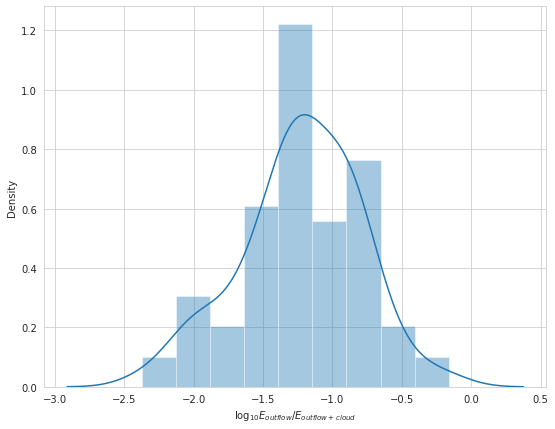

In [ ]:

##########################################################################################################################
#>>>>>>> this generates file required for finding protostellar association with Kryukova

pilotL_df = pilotL.to_pandas().round({'RAJ2000':3,	'DecJ2000':3,	'Distance':2,	'Vc':1,'Mass':2, 'Momentum':2,	'Energy':2,	'Dynamical Time':1, 'RA_proto':3,	'Dec_proto':3,	'logL_proto':1,	'alpha_proto':1})
of_newfields_df = of_newfields.to_pandas().round({'RAJ2000':3,	'DecJ2000':3, 'Distance':2,	'Vc':1,'Mass':2})[['ID','RAJ2000','DecJ2000',	'Vc',	'Distance']]


outflowsCloud_df = outflowsCloud.to_pandas().round({'RAJ2000':3,	'DecJ2000':3,	'Distance':2,	'Vc':1,'Mass':2, 'Momentum':2,	'Energy':2,	'Dynamical Time':1}).sort_values('RAJ2000').reset_index()
cygx_all = pd.merge(pilotL_df, of_newfields_df, how='outer').sort_values('RAJ2000').reset_index()

outflowsCloud_df_refined = outflowsCloud_df[['ID','RAJ2000', 'DecJ2000', 'Mass', 'Momentum', 'Energy','Dynamical Time', 'Cloud_Mass', 'Cloud_Energy', 'Energy_(of/cloud+of)']]
cygx_all_refined = cygx_all[['ID', 'RAJ2000', 'DecJ2000', 'Distance', 'Vc']]

cygx_combined_out = pd.merge(cygx_all_refined, outflowsCloud_df_refined, on=['RAJ2000','DecJ2000'], how='outer').sort_values('RAJ2000').drop('ID_y', axis=1).rename({'ID_x':'ID'}, axis=1)
#cygx_combined_out.to_csv(filepath + 'cygx_combined_out.csv') # this file is manually modeified for NaN values/repeated cells. Read this from filepath then run 



In [ ]:
cygx_combined_out = pd.read_csv(filepath + '/Large-sample-outflows-in-CygX-and-ML-methods/data/cygx_combined_out.csv').round({'RAJ2000':3, 'DecJ2000':3})


cygx_combined_out = pd.read_csv(filepath + 'cygx_combined_out.csv').round({'RAJ2000':3, 'DecJ2000':3})
cygx_combined_out = cygx_combined_out[cygx_combined_out['Energy_(of/cloud+of)']>0]
cygx_combined_out['log10_Energy_(of/cloud+of)'] = np.log10(cygx_combined_out['Energy_(of/cloud+of)'])

plt.figure(figsize=(9,7))
sns.distplot(cygx_combined_out['log10_Energy_(of/cloud+of)'], axlabel='log$_{10}E_{outflow}/E_{outflow+cloud}$')
#sns.histplot(outflowsCloud_df1['log10_Energy_(of/cloud+of)'])

#plt.savefig('outflow+cloud_hist.pdf')
plt.show()
#plt.close()

FileNotFoundError: ignored

In [ ]:
##########################################################################################################################
### Development of clustering algorithm for outflow-protostar associaton (non ML)

#outflows = QTable.read('CygX_pilot.fit')
protostars = QTable.read(filepath + 'asu (1).fit')

df_outflows =  pd.read_csv(filepath + 'cygx_combined_out.csv').drop('Unnamed: 0', axis=1).round({'RAJ2000':3, 'DecJ2000':3})
df_proto = protostars.to_pandas().round({'RAJ2000':3, 'DEJ2000':3})
t =QTable(names=('ID','RAJ2000' ,'DecJ2000', 'RA_proto', 'Dec_proto', 'Dist_proto', 'logL_proto', 'alpha_proto'), dtype=('U16', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8'))
df_t = t.to_pandas()
D = ((np.max(df_outflows['RAJ2000']) - np.min(df_outflows['RAJ2000']))**2 + (np.max(df_outflows['DecJ2000']) - np.min(df_outflows['DecJ2000']))**2)**0.5
D = (D*u.deg).to(u.arcsecond)
Dist0 = D
for i in range(len(df_outflows)):
  xo = df_outflows['RAJ2000'][i]
  yo = df_outflows['DecJ2000'][i]
  for j in range(len(df_proto)):
    xp = df_proto['RAJ2000'][j]
    yp = df_proto['DEJ2000'][j]
    dist = ((((xo - xp)**2 + (yo - yp)**2)**(0.5))*u.deg).to(u.arcsecond)
    if dist <= Dist0: # find a large radius # if current dist is less than the previous dist, select this object as the nearest protostar
      x_proto = xp
      y_proto = yp
      logL = df_proto['logL'][j]
      alpha = df_proto['alpha'][j]
      #print(logL)
      Dist0 = dist # and update previous dist by the current one. This will loop through the list of Kryukova protostars 
      #print(Dist0)
    else:
      pass
  t.add_row([df_outflows.copy()['ID'][i],df_outflows['RAJ2000'][i], df_outflows['DecJ2000'][i], x_proto, y_proto, Dist0 ,logL, alpha]) # this is similar to concatenating to pandas dataFrame, but we use astropy table instead
  Dist0 = D

t['RA_proto'].unit = u.deg
t['Dec_proto'].unit = u.deg
t['logL_proto'].unit = u.solLum
t['Dist_proto'].unit = u.arcsecond 
t.write(filepath + '/Large-sample-outflows-in-CygX-and-ML-methods/data/cygx_complete_list_protostars(Kry).fit', overwrite=True)


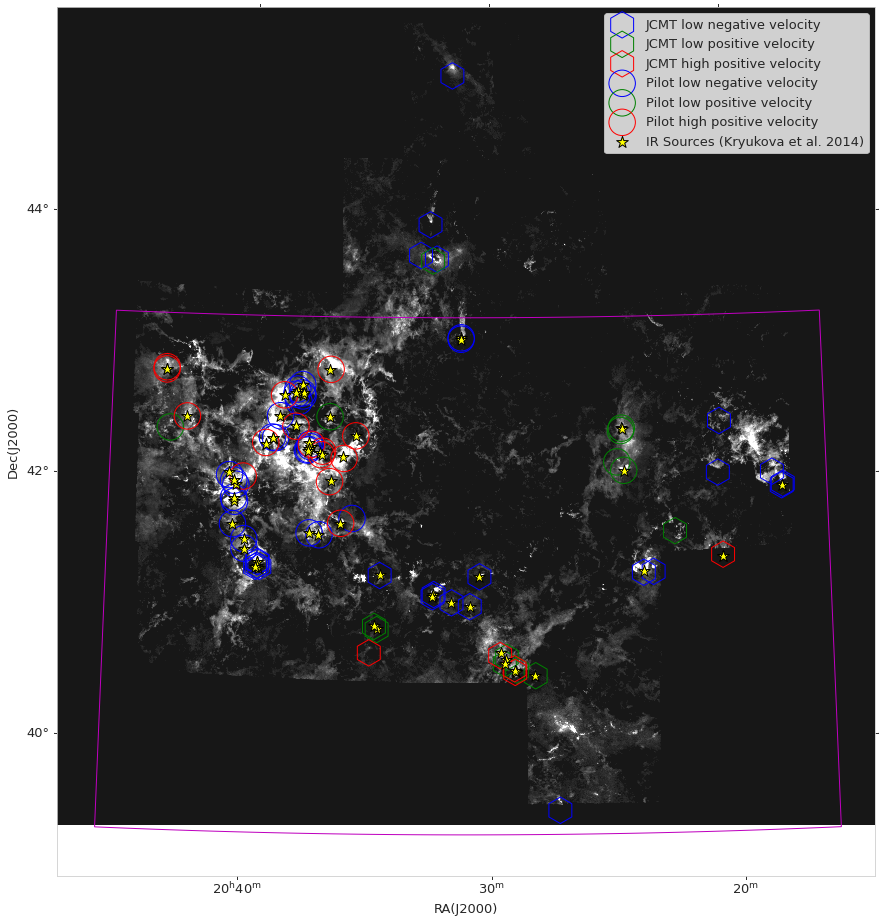

In [ ]:
#################################################################################################################
###############################      CREATE COMBINED MAP       ##################################################
#################################################################################################################
## >>>>>>>>>>>>>>>> All the required tables and file are loaded in the read cell with filepath >>>>>

matplotlib.rcParams.update({'font.size': 13})

cygxmom0 = cygx_mom0.moment(order=0, axis=0)

of_newfields_highp = of_newfields[of_newfields['Vc']>7.5*u.km/u.s]
of_newfields_lowp = of_newfields[(of_newfields['Vc']<7.5*u.km/u.s) & (of_newfields['Vc']>=0*u.km/u.s)]
of_newfields_lown = of_newfields[of_newfields['Vc']<0*u.km/u.s]

# combined field (pilot+newfields) protostars from Kryukova catalogue 
proto = QTable.read(filepath + '/Large-sample-outflows-in-CygX-and-ML-methods/data/cygx_complete_list_protostars(Kry).fit')
proto_df = proto.to_pandas() 
proto[proto['Dist_proto'] < 100*u.arcsec].write(filepath + '/Large-sample-outflows-in-CygX-and-ML-methods/data/cygx_complete_list_protostars(Kry)_arcmin.fit', overwrite=True)

fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(1,1,1, projection=cygxmom0.wcs)
im=ax.imshow((cygxmom0).value,interpolation='nearest',label='$^{12}CO$',origin='lower', cmap='gray',vmin=-5,vmax=50)
ax.set_ylabel("Dec(J2000)")
ax.set_xlabel("RA(J2000)")
ax.grid(color='white', alpha=1, ls='solid')

#clb=plt.colorbar(im)
#clb.set_label('$^{12}$CO Integrated Intensity (K km s$^{-1}$)', labelpad=5, y=.5, rotation=90)

#ax.scatter(stars_kry['RAJ2000'].data, stars_kry['DEJ2000'].data,transform=ax.get_transform('world'), marker='*',s=200,edgecolor='black',facecolor='yellow')
# this works fine. Just disabled for now. Will use similar list for outflows 
size = 700
#ax.scatter(of_newfields['RAJ2000'].data, of_newfields['DecJ2000'].data,transform=ax.get_transform('world'), marker='o',s=700,edgecolor='green',facecolor='none',label='JCMT-Newfields')
ax.scatter(of_newfields_lown['RAJ2000'].data, of_newfields_lown['DecJ2000'].data,transform=ax.get_transform('world'), marker='h',s=size,edgecolor='blue',facecolor='none',label='JCMT low negative velocity')
ax.scatter(of_newfields_lowp['RAJ2000'].data, of_newfields_lowp['DecJ2000'].data,transform=ax.get_transform('world'), marker='h',s=size,edgecolor='green',facecolor='none',label='JCMT low positive velocity')
ax.scatter(of_newfields_highp['RAJ2000'].data, of_newfields_highp['DecJ2000'].data,transform=ax.get_transform('world'), marker='h',s=size,edgecolor='red',facecolor='none',label='JCMT high positive velocity')


ax.scatter(of_DR21['RAJ2000'].data, of_DR21['DecJ2000'].data,transform=ax.get_transform('world'), marker='o',s=size,edgecolor='blue',facecolor='none',label='Pilot low negative velocity')
ax.scatter(of_cygrift['RAJ2000'].data, of_cygrift['DecJ2000'].data,transform=ax.get_transform('world'), marker='o',s=size,edgecolor='green',facecolor='none',label='Pilot low positive velocity')
ax.scatter(of_W75['RAJ2000'].data, of_W75['DecJ2000'].data,transform=ax.get_transform('world'), marker='o',s=size,edgecolor='red',facecolor='none',label='Pilot high positive velocity')
#ax.scatter(proto['RA_proto'], proto['Dec_proto'],transform=ax.get_transform('world'), marker='*',s=150,edgecolor='black',facecolor='yellow',label='IR Sources (Kryukova et al. 2014)') 
ax.scatter(proto[proto['Dist_proto'] < 100*u.arcsec]['RA_proto'], proto[proto['Dist_proto'] < 100*u.arcsec]['Dec_proto'],transform=ax.get_transform('world'), marker='*',s=150,edgecolor='black',facecolor='yellow',label='IR Sources (Kryukova et al. 2014)') 

# show a rectangle indicating the Kryukova survey range >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
_, b, _ = cygx_mom0.world[0, :, 0]  #extract latitude world coordinates from cube
b, _ = cygxmom0.world[:, 0] 
_, _, l = cygx_mom0.world[0, 0, :]  #extract longitude world coordinates from cub

length = max(kryu_list['RAJ2000']) - min(kryu_list['RAJ2000'])
# we use b.min instead of min declination in Kryukova list because Kry list expands far beyond out dataset, which is unnecessary to include 
width = max(kryu_list['DEJ2000']) - b.min().value 

#r = Quadrangle((max(proto['RA_proto']),min(proto['Dec_proto']))*u.deg, -3*u.deg, 2*u.deg,edgecolor='white', facecolor='none',transform=ax.get_transform('fk5')) 

# >>> the location is the top left of Kry survey range, -length because RA is measured right to left, -width because we expand the rectangle downward from top >>>>>>>
r = Quadrangle((max(kryu_list['RAJ2000']), max(kryu_list['DEJ2000']))*u.deg, -length*u.deg, -width*u.deg,edgecolor='m', facecolor='none',transform=ax.get_transform('fk5'))
ax.add_patch(r)


plt.legend()

plt.savefig(filepath + '/Large-sample-outflows-in-CygX-and-ML-methods/output/mom0+outflows_arcmin.pdf',format='pdf',bbox_inches = 'tight', dpi=300,overwrite=True)
plt.show()
plt.close()

In [ ]:
##########################################################################################################################


#>>>>>> Run this for outflow lists w/ and w/o protostars 

proto_arcmin = QTable.read(filepath + '/data/cygx_complete_list_protostars(Kry)_arcmin.fit')
proto_arcmin.to_pandas().round({'RAJ2000':3,	'DecJ2000':3,	'RA_proto':3,	'Dec_proto':3,	'Dist_proto':0,	'logL_proto':1,	'alpha_proto':1}).to_csv(filepath + '/data/proto_arcmin.csv')
cygx_combined_out = pd.read_csv(filepath + '/data/cygx_combined_out.csv').round({'RAJ2000':3, 'DecJ2000':3})
#####################################
proto_arcmin = pd.read_csv(filepath + '/data/proto_arcmin.csv').round({'RAJ2000':3, 'DecJ2000':3})


cygx_ofs_with_LIR = pd.merge(cygx_combined_out, proto_arcmin,on=['RAJ2000','DecJ2000'], how='inner')#.drop({'Unnamed: 0','ID_y'}, axis=1).rename({'ID_x':'ID'}, axis=1)

cygx_ofs_with_LIR.to_csv(filepath + '/data/cygx_ofs_with_LIR.csv')

ra_with_LIR = cygx_ofs_with_LIR['RAJ2000']
dec_with_LIR =  cygx_ofs_with_LIR['DecJ2000']

cygx_ofs_without_LIR = cygx_combined_out[~((cygx_combined_out['RAJ2000'].isin(ra_with_LIR)) & (cygx_combined_out['DecJ2000'].isin(dec_with_LIR)))]
cygx_ofs_without_LIR.to_csv(filepath + '/data/cygx_ofs_without_LIR.csv')

In [ ]:
cygx_combined_out

,Unnamed: 0,ID,RAJ2000,DecJ2000,Distance,Vc,Mass,Momentum,Energy,Dynamical Time,Cloud_Mass,Cloud_Energy,Energy_(of/cloud+of)
0,0,0,304.495,41.938,1.50,-2.6,0.13,0.41,0.14,11.7,206.007000,32.998000,0.004225
1,1,0,304.506,41.926,1.50,-3.9,5.06,10.06,2.33,21.6,409.183000,50.672000,0.043925
2,2,0,304.602,42.033,1.50,-3.9,1.29,2.96,0.77,18.9,175.675000,16.922000,0.043685
3,84,0,305.121,41.414,1.30,10.4,0.42,0.80,0.16,20.3,22.047000,1.424000,0.103275
4,4,0,305.131,42.434,1.50,-1.8,0.23,0.60,0.18,31.5,18.900000,1.986000,0.083526
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,79,G81.632+0.102,310.185,42.025,1.50,-6.8,1.85,3.95,0.95,20.4,290.150548,15.102715,0.059278
80,80,new?,310.639,42.463,1.30,8.1,0.03,0.24,0.25,2.4,26.902397,21.443082,0.011364
81,81,G82.189-0.042,310.813,42.374,0.65,7.2,0.18,0.55,0.24,8.5,3.525396,1.546235,0.136169
82,82,G82.581+0.203,310.867,42.833,1.30,11.1,2.43,15.60,12.50,4.5,98.995231,31.007027,0.287257


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10


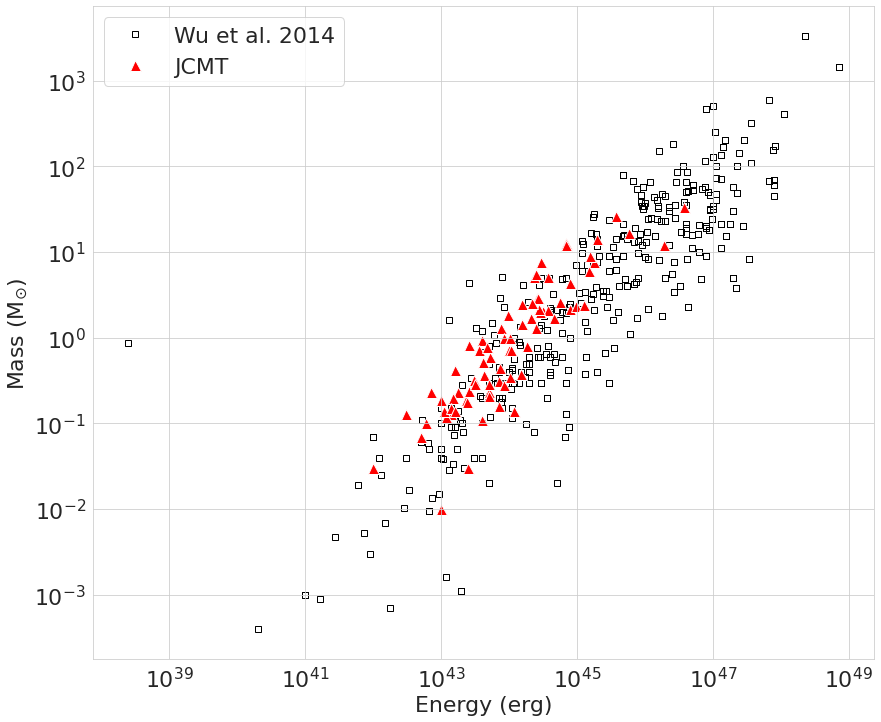

=========================+++++++++++++++++++++++++++++++++++++=========++++++++++++++++====================


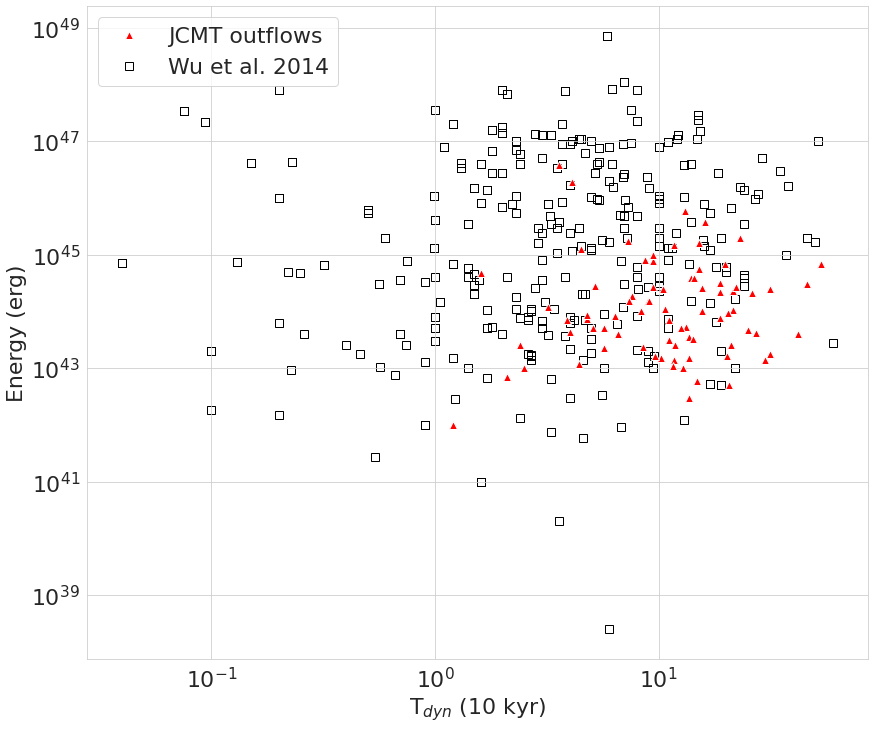

In [ ]:

####################################################################################################################
##########################                                             #############################################
##########################          WU COMPARISON SCATTER PLOTS        #############################################
##########################                                             #############################################
####################################################################################################################
#outflows = Table.read('cygxPilot_proto.fits')
outflows = cygx_combined_out
mass_p= outflows['Mass']
dynTime_p = outflows['Dynamical Time']
energy_p = outflows['Energy']
energy_p2 = energy_p*1e44


table_wu = wu 
mass_wu=table_wu['Mass']
dynTime_wu = table_wu['t']
energy_wu = table_wu['E'] #remove rows with mass=0
energy_wu = (energy_wu).to(u.erg)

#gs = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)

#ax1 = fig.add_subplot(gs[0,0])
enlog = np.log10(energy_wu.value[energy_wu.value>1e40])
mlog = np.log10(mass_wu[energy_wu.value>1e40])

energy_p1 = np.array([energy_p])*1e44
mass_p1 = np.array([mass_p])

matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(14,12),constrained_layout=False)
plt.loglog(energy_wu, mass_wu,'ks',color='black', markerfacecolor='none', markeredgecolor='black',zorder=0, label='Wu et al. 2014')
plt.loglog(energy_p2, mass_p,'r^', markeredgecolor='white', markersize=11, zorder=0, label='JCMT')
plt.xlabel('Energy (erg)')
plt.ylabel('Mass (M$_{\odot}$)')
#plt.axes().set_aspect(aspect=1.0)
#plt.xlim(left=1e40)
plt.legend(loc='upper left')

plt.savefig(filepath + '/output/Wu-cygx.pdf',format='pdf',bbox_inches = 'tight', dpi=300,overwrite=True)
plt.show()
plt.close()

print('=========================+++++++++++++++++++++++++++++++++++++=========++++++++++++++++====================')
plt.figure(figsize=(14,12),constrained_layout=False)
plt.loglog(dynTime_p, energy_p2,'r^', markeredgecolor='white',markersize=8, label='JCMT outflows')
plt.loglog(dynTime_wu, energy_wu, 'ks', markerfacecolor='none', markeredgecolor='black', zorder=0,markersize=8, label='Wu et al. 2014')
plt.ylabel('Energy (erg)')
plt.xlabel('T$_{dyn}$ (10 kyr)')
plt.legend(loc='upper left')
plt.savefig(filepath + '/output/Wu-cygx_dynT.pdf',format='pdf',bbox_inches = 'tight', dpi=300,overwrite=True)
plt.show()
plt.close()


307.80145000000005 [307.86395 307.73895] deg 43.096000000000004 [43.03975 43.15225] deg
0.06249999599998546 0.06249999599998546 0.05624999639999828 0.05624999639999828
1249.8509514491009
812.1004049500414
(13, 17) (19, 13)
10.0 19.0 22.0 11.0
-13.128 km / s 11.888 km / s



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: DeprecationWarning: scipy.nanmin is deprecated and will be removed in SciPy 2.0.0, use numpy.nanmin instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:194: DeprecationWarning: scipy.nanmax is deprecated and will be removed in SciPy 2.0.0, use numpy.nanmax instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:204: DeprecationWarning: scipy.nanmax is deprecated and will be removed in SciPy 2.0.0, use numpy.nanmax instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: DeprecationWarning: scipy.nanmax is deprecated and will be removed in SciPy 2.0.0, use numpy.nanmax instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:221: DeprecationWarning: scipy.nanmean is deprecated and will be removed in SciPy 2.0.0, use numpy.nanmean instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:222: DeprecationWarning: scipy.nanmean is deprecated and will be re

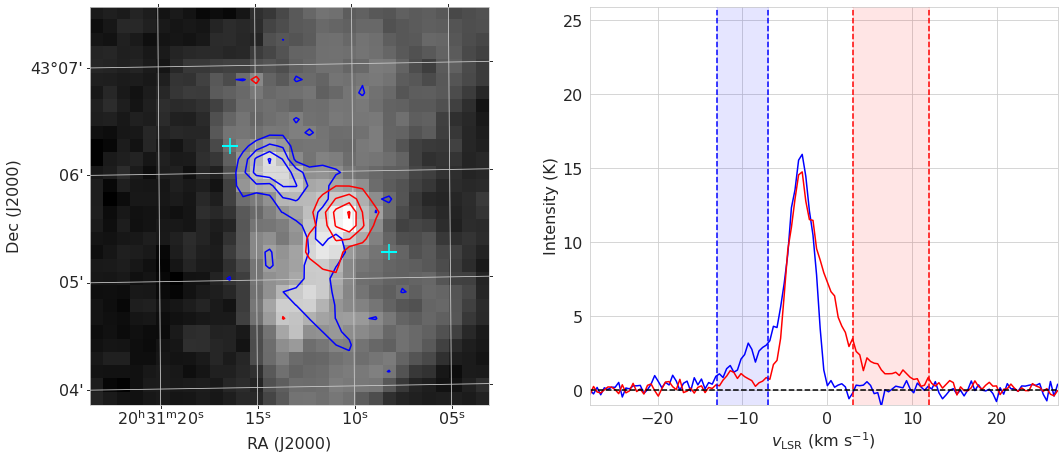

In [ ]:
###########################################################################################################
#################                                                                        ##################
#################    ZOOMED IN SAPTIAL MAP IN 12CO(3-2) W/ AN ARROW POINTING AT          ##################
#################    OUTFLOW LOCATION AND INSET SHOWING WINGS IN SPECTRAL EMISSION       ##################
###########################################################################################################

from astropy.table import QTable
from astropy import units as u

##### FUNCTIONS ##########################################################################################
def f(pb,pr): # pb = blue lobe pixel. USE A LINEAR FUNCTION JOINING BLUE AND RED LOBE PIXELS
    x0 = (pb[0]+pr[0])/2
    y0 = (pb[1]+pr[1])/2
    dx = np.abs(pb[0]-x0)
    dy = np.abs(pb[1]-y0) # since y0 is midpoint, the distances from pb[1] and pr[1] are the same 
    if np.abs(pr[0]-pb[0]) <= 1e-2: # if blue and red pixels are vertical so slope=infty
        xb = x0 - 2*dx # dx = 0 anyway; all x-coordinates are the same 
        xr = x0 + 2*dx
        if pb[1] < y0:
            yb = pb[1] - 2*dy # dist between mid point and blue pixel
            yr = pr[1] + 2*dy
        elif pb[1] > y0:
            yb = pb[1] + 2*dy
            yr = pr[1] - 2*dy
    else:
        m = (pr[1]-pb[1])/(pr[0]-pb[0]) # finite slope
        if pb[0] < x0:
            xb = x0 - 2*dx
            xr = x0 + 2*dx
            yb = y0 + m*(xb-x0)
            yr= y0 + m*(xr-x0)
        elif pb[0] > x0:
            xb = x0 + 2*dx
            xr = x0 - 2*dx
            yb = y0 + m*(xb-x0)
            yr = y0 + m*(xr-x0)
    pb2 = (xb,yb)
    pr2 = (xr,yr)
    return pb2, pr2

 ### DEFINE FUNCTIONS 

def length(s):
    if s%2 == 0: #modulo zero => even
        l = s/2
    else:
        l = (s+1)/2
    return l

def Jnu(T, nu=330.5*u.GHz):
    jnu = ((con.h * nu / con.k_B)
            / (np.exp(con.h * nu / (con.k_B * T)) - 1))
    return( jnu )

def G(v, Amp, V0, Sig0, Offset):
    return( Amp * np.exp(-(v-V0)**2/(2*Sig0**2))+Offset )

def Quad(v, c0, v0, c2):
    return( c0 + c2 * (v - v0)**2 ) # a + b(x-x0)^2 form

################################################################################################################    
# Read in data

#cygX_init = of_newfieldsof_newfields = QTable.read(filepath + 'table_newfields_input.fit')
#cygX_init = QTable.read(filepath+'table_newfields_input.fit') ### CHANGE FIELD NAME ###
#cygX_init = cygX_init_newfields
#cygX = cygX_newfields

cygX_init = cygX_init_pilot_1_5kpcA
cygX = cygX_pilot
#proto = Table.read('asu (1).fit')
warnings.filterwarnings('ignore', category=UserWarning, append=True)
## CREATE EMPTY TABLE FOR OUTPUT MASS, MOMENTUM, ENERGY 
t = QTable(names=('Seq','ID','RAJ2000','DecJ2000','Mass', 'Momentum', 'Energy','Dynamical Time'),
           dtype=('i8','U10','f8','f8','f8','f8','f8','f8'))  
for z in range(1,2):#len(cygX_init)):
    vbmin = cygX_init[z]['vbmin'] # BLUE WING
    vbmax = cygX_init[z]['vbmax']
    vrmin = cygX_init[z]['vrmin']
    vrmax = cygX_init[z]['vrmax'] # RED WING
    

    ra_b = cygX_init[z]['RAJ2000_blue'] 
    dec_b = cygX_init[z]['DecJ2000_blue']
    ra_r = cygX_init[z]['RAJ2000_red']
    dec_r = cygX_init[z]['DecJ2000_red']

    RA = (ra_b.value+ra_r.value)/2
    Dec = (dec_b.value+dec_r.value)/2
    
    distance = (cygX_init[z]['Distance']).to(u.pc).value

    cube_12co = cygX ### CHANGE FIELD NAME ###

    _, b, _ = cube_12co.world[0, :, 0]  #extract latitude world coordinates from cube
    _, _, l = cube_12co.world[0, 0, :]  #extract longitude world coordinates from cube

    ##### Spatial boundary includes 50 pixels on each side from blue and red lobes 
    db = np.abs(cube_12co.wcs.celestial.wcs.get_cdelt()[0])*27#15
    dl = -(cube_12co.wcs.celestial.wcs.get_cdelt()[1])*30#20
    

    
    bmin = Dec-1*db
    bmax = Dec+1*db #these factors are introduced for adjusting the cropping wondow to make it symmetrical
    lmin = RA-dl
    lmax = RA+dl

    lat_range = [bmin, bmax]*u.deg 
    lon_range = [lmin, lmax]*u.deg
    print(RA,lon_range, Dec,lat_range)
    print(np.abs(RA-lon_range[0].value),np.abs(RA-lon_range[1].value),np.abs(Dec-lat_range[0].value),np.abs(Dec-lat_range[1].value))
    ##### Spectral boundary includes 15 km/s on each side of the vel range 
    dv = (cube_12co.spectral_axis[1]-cube_12co.spectral_axis[0]).value
    vlo = vbmin-15*u.km/u.s
    vhi = vrmax+15*u.km/u.s

    box = 15
    x0, y0, _ = cube_12co.wcs.wcs_world2pix(RA, Dec, 0, 0)
    print(x0)
    print(y0)
    slab = cube_12co.spectral_slab(vlo, vhi) 
    subcube = slab[:, int(y0-box):int(y0+box), int(x0-box):int(x0+box)]

    ###############################################################################################################
    ###################################  VISUALIZATION OF OUTFLOW   ###############################################
    ###############################################################################################################

    ### EXTRACT PIXEL COORDINATES FROM WORLD SKY COORDINATES 

    from astropy import wcs
    cdelt = utils.proj_plane_pixel_scales(subcube.wcs)
    cdelt
    #w = wcs.WCS(cube[0].header)
    pix_b_x, pix_b_y, _  = subcube.wcs.wcs_world2pix(ra_b.value,dec_b.value, 0,0)
    pix_r_x, pix_r_y, _ = subcube.wcs.wcs_world2pix(ra_r.value,dec_r.value, 0,0)

    xb = int(round(float(pix_b_x),0)) # These values are interger pixel numbers
    yb = int(round(float(pix_b_y),0))
    xr = int(round(float(pix_r_x),0) )     
    yr = int(round(float(pix_r_y),0))
   
    # create pv-slice (crop both spatial and spectral axes)

    pb = (xb,yb) # BLUE LOBE CENTER PIXEL 
    pr = (xr,yr) # RED LOBE CENTER PIXEL
    print(pb,pr)

    # create two extended points (pixels) along the pv-slice line 
    xbl = f(pb,pr)[0][0]
    ybl = f(pb,pr)[0][1]
    xrh = f(pb,pr)[1][0]
    yrh = f(pb,pr)[1][1]
    print(xbl,ybl,xrh,yrh)
    

    width = 1
    path = Path([(xbl, ybl), (xrh, yrh)], width) 
    slab=cygX.spectral_slab(vbmin, vrmax) # range from spectral bipolar plot
    vslabmin = slab.spectral_extrema[0]
    vslabmax = slab.spectral_extrema[1]
    print(vslabmin,vslabmax)
    pvslice12 = extract_pv_slice(slab, path)

    ## spatial coordinates of pv-slice for green arrow display on contour map    
    coord_b_RA, coord_b_Dec, _ = subcube.wcs.wcs_pix2world(xbl,ybl,0,0)
    coord_r_RA, coord_r_Dec, _ = subcube.wcs.wcs_pix2world(xrh,yrh,0,0)
    
    dx_coord = coord_r_RA - coord_b_RA
    dy_coord = coord_r_Dec - coord_b_Dec
   

    ####################################################################################################################
    ##################################                 CONTOUR                ##########################################
    ####################################################################################################################

    import matplotlib.patches as patches

    slab_blue=subcube.spectral_slab(vbmin, vbmax) #contour
    slab_red = subcube.spectral_slab(vrmin, vrmax) ######## CHANGE HERE #########
    slab_main = subcube.spectral_slab(vbmin, vrmax) 

    mom0_main =slab_main.moment(order=0)
    mom0_blue =slab_blue.moment(order=0)
    mom0_red =slab_red.moment(order=0)
    
    fig = plt.figure(figsize=(14,12),constrained_layout=True)
    matplotlib.rcParams.update({'font.size': 16})

    gs = gridspec.GridSpec(nrows=2, ncols=6, figure=fig)

    ax1 = fig.add_subplot(gs[0, 0:3],projection=subcube.wcs.celestial)#1,1,subplot_kw={'projection':subcube.wcs.celestial})
    im1=ax1.imshow((mom0_main.value),interpolation='nearest',label='$^{12}CO$',
                  origin='lower', cmap='gray',vmin=nanmin(mom0_main).value,vmax=nanmax(mom0_main).value)
    ax1.set_ylabel("Dec (J2000)")
    ax1.set_xlabel("RA (J2000)")
    ax1.set_autoscale_on(False)

    lat = ax1.coords[0]
    lat.set_major_formatter('hh:mm:ss')
    lon = ax1.coords[1]
    lon.set_major_formatter('dd:mm')

    cs = ax1.contour(mom0_blue.value,colors="blue",levels=(np.array([0.25,0.5,0.75,1]))*int(nanmax(mom0_blue).value))
    cs = ax1.contour(mom0_red.value,colors="red",levels=(np.array([0.25,0.5,0.75,1]))*int(nanmax(mom0_red).value))
    ax1.scatter(coord_b_RA, coord_b_Dec,transform=ax1.get_transform('world'),marker='+',s=250,edgecolor='black', facecolor='cyan')
    ax1.scatter(coord_r_RA, coord_r_Dec,transform=ax1.get_transform('world'),marker='+',s=250,edgecolor='black', facecolor='cyan')
    # Create a Rectangle patch
    #rect = patches.Rectangle((proto[z]['RAJ2000'].wcs_world2pix, proto[z]['DecJ2000'].wcs_world2pix), 2, 2, linewidth=1, edgecolor='r', facecolor='none')

    ###################################################################################################################
    ##################################         SPECTRAL BIPOLARITY            ##########################################
    ####################################################################################################################
    pix = 2
    
    mb = subcube[:,(yb-pix):(yb+pix),(xb-pix):(xb+pix)].filled_data[:] 
    mr = subcube[:,(yr-pix):(yr+pix),(xr-pix):(xr+pix)].filled_data[:]


    ax2 = fig.add_subplot(gs[0,3:])
    plt.plot(subcube.spectral_axis, nanmean(mb,axis=(1,2)).value/1.0,color='blue')
    plt.plot(subcube.spectral_axis, nanmean(mr,axis=(1,2)).value/1.0,color='red')
    plt.xlabel("$v_{\mathrm{LSR}}$ (km s$^{-1}$)")
    plt.ylabel("Intensity (K)")

    plt.axvline(x=vbmin.value,color='b',linestyle='--') 
    plt.axvline(x=vbmax.value,color='b',linestyle='--')
    plt.axvline(x=vrmin.value,color='r',linestyle='--')
    plt.axvline(x=vrmax.value,color='r',linestyle='--')

    plt.axhline(y=0,color='k',linestyle='--')
    
    xminvalue = subcube.spectral_axis.min().value
    xmaxvalue = subcube.spectral_axis.max().value
    plt.xlim(left=xminvalue)
    plt.xlim(right=xmaxvalue)
    plt.ylim(bottom=-1)
    
    contourmax_blue = nanmax(nanmean(mb,axis=(1,2))).value
    contourmax_blue = nanmax(nanmean(mr,axis=(1,2))).value
    ymaxvalue = nanmax([nanmax(nanmean(mb,axis=(1,2))).value,nanmax(nanmean(mr,axis=(1,2))).value])+10
    if ymaxvalue == NaN:
        yvalue = 25
    else:
        yvalue = ymaxvalue 
    plt.ylim(top=yvalue)

    plt.axvspan(vbmin.value,vbmax.value,ymin=0,ymax=1,alpha=0.1, color='b')#ymin, ymax are in terms of %age of height to be covered 
    plt.axvspan(vrmin.value, vrmax.value,alpha=0.1, color='r')

    plt.savefig(filepath + '/output/Pilot_'+str(round(RA,2))+'+'+str(round(Dec,2))+'.pdf',format='pdf',bbox_inches = 'tight', dpi=300,overwrite=True)
    plt.show()
    plt.close()


In [ ]:
subcube_mom = sub_cube_co.sum(axis=0).value*u.K
type(co_mean)

numpy.ndarray

In [ ]:
type(subcube_mom)

astropy.units.quantity.Quantity

In [ ]:
sub_cube_co

subcube_mom = sub_cube_co.moment(order=0, axis=0)
s1 = subcube_mom[pd.notnull(subcube_mom)]
co_mean[k] = (s1.sum(axis=0)).mean() * u.K #* u.km/u.s

SpectralCube with shape=(98, 596, 474):
 n_x:    474  type_x: RA---TAN  unit_x: deg    range:   310.017229 deg:  311.478992 deg
 n_y:    596  type_y: DEC--TAN  unit_y: deg    range:    44.173742 deg:   45.454612 deg
 n_s:     98  type_s: VOPT      unit_s: km / s  range:      -11.087 km / s:      29.978 km / s

In [ ]:
         subcube_mom = sub_cube_co.moment(order=0, axis=0)                  ## <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< re attach this part 
            print('subcube_mom shape=',subcube_mom.shape,'\n')
            s1 = subcube_mom[~np.isnan(subcube_mom)]#subcube_mom[pd.notnull(subcube_mom)]
            print('s1 shape=',s1.shape, '\n')
            print(s1)
            co_mean[k] = subcube_mom[~np.isnan(subcube_mom)].mean()* u.K #* u.km/u.s#(s1.sum(axis=0)).mean() * u.K #* u.km/u.s
            #co_mean[k] =  np.nanmean((sub_cube_co.moment(order=0, axis=0)).value) * u.K * u.km/u.s

(596, 474)

In [ ]:
co_mean = np.zeros(N**2) 
subcube_mom =(sub_cube_co.sum(axis=0)*dv).reshape(-1,1)*value#.moment(order=0, axis=0) # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< HERE HERE HERE <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< ||||||||||||||||||||||   IndexError happening here but WHY ????????????????
co_mean[k] = subcube_mom 

ValueError: ignored

In [ ]:

co_mom0r = (np.expand_dims(co.moment(order=0, axis=0), axis=0))
co_mom0 = co_mom0r

In [ ]:
co_mom0
#sub_cube_co = co_mom0.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])
#sub_cube_co

<Projection [[[nan, nan, nan, ..., nan, nan, nan],
              [nan, nan, nan, ..., nan, nan, nan],
              [nan, nan, nan, ..., nan, nan, nan],
              ...,
              [nan, nan, nan, ..., nan, nan, nan],
              [nan, nan, nan, ..., nan, nan, nan],
              [nan, nan, nan, ..., nan, nan, nan]]] km / s>

In [ ]:
co

SpectralCube with shape=(98, 2966, 2471):
 n_x:   2471  type_x: RA---TAN  unit_x: deg    range:   304.157172 deg:  311.481944 deg
 n_y:   2966  type_y: DEC--TAN  unit_y: deg    range:    39.256583 deg:   45.458596 deg
 n_s:     98  type_s: VOPT      unit_s: km / s  range:      -11.087 km / s:      29.978 km / s

In [ ]:
lon_range

[<Quantity 308.57400961 deg>, <Quantity 310.01698979 deg>]

In [ ]:
i=1
j=0
lon_range = [xmin+i*1.1*dx, xmin+(i+1)*1*dx]
lat_range = [ymin+j*1.1*dy, ymin+(j+1)*1*dy]
sub_cube_co = co.subcube(xlo=(lon_range[0]), xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])
subcube_mom = (np.expand_dims(sub_cube_co.moment(order=0, axis=0), axis=0)) * u.K
print(np.nanmean(subcube_mom[~np.isnan(subcube_mom)]))
sub_cube_co.shape

IndexError: ignored

In [ ]:
sub_cube_co = co.subcube(xlo=(lon_range[0]), xhi=round(lon_range[1].value,2)*u.deg, ylo=lat_range[0], yhi=lat_range[1])
sub_cube_co
#subcube_mom = (np.expand_dims(sub_cube_co.moment(order=0, axis=0), axis=0)) * u.K

SpectralCube with shape=(98, 611, 506):
 n_x:    506  type_x: RA---TAN  unit_x: deg    range:   308.551307 deg:  310.019350 deg
 n_y:    611  type_y: DEC--TAN  unit_y: deg    range:    41.709399 deg:   43.006333 deg
 n_s:     98  type_s: VOPT      unit_s: km / s  range:      -11.087 km / s:      29.978 km / s

INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting vmin to -1.720e+01 [aplpy.core]
INFO: Auto-setting vmax to  7.247e+01 [aplpy.core]
INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting vmin to  2.820e+00 [aplpy.core]
INFO: Auto-setting vmax to  5.995e+01 [aplpy.core]
k-value= 0 

nan pixel
k-value= 1 

non nan pixel
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]] K km / s


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 2 

non nan pixel
[[[       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]
  ...
  [-3.0457816 -1.2813305  0.9907598 ...        nan        nan        nan]
  [ 1.7780007  2.0956705  2.2241683 ...        nan        nan        nan]
  [ 0.8452083  1.4289942  3.275539  ...        nan        nan        nan]]] K km / s
k-value= 3 

non nan pixel
[[[-2.4314594e+00  9.1659546e-01  1.1934174e+00 ...            nan
              nan            nan]
  [ 3.4787753e-01 -2.3469837e+00 -1.7671590e+00 ...            nan
              nan            nan]
  [ 6.7269099e-01 -1.1851484e-01 -2.3126006e-03 ...            nan
              nan            nan]
  ...
  [-3.6486084e+00  3.3092523e+00  1.8216245e+00 ...            nan
              nan            nan]
  [ 8.7910444e-03  3.0919223e+00  1.0792000e+00 ...            nan
        

<string>:6: RuntimeWarning: Mean of empty slice


k-value= 6 

non nan pixel
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]] K km / s


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 7 

nan pixel
k-value= 8 

non nan pixel
[[[-9.404385   -1.6089218   0.6659475  ...         nan         nan
           nan]
  [-6.681365   -0.8926704   1.5182297  ...         nan         nan
           nan]
  [-0.90139216 -0.77170736  3.3124225  ...         nan         nan
           nan]
  ...
  [ 1.3580047   0.6695186  -1.2289798  ...         nan         nan
           nan]
  [ 3.5452251  -0.49964118 -4.254204   ...         nan         nan
           nan]
  [ 3.1589413  -0.0649761  -2.7257297  ...         nan         nan
           nan]]] K km / s
k-value= 9 

non nan pixel
[[[ 0.49065286  3.9501476  -0.5932399  ...         nan         nan
           nan]
  [ 0.67030936  5.6447973   2.41969    ...         nan         nan
           nan]
  [-2.9454412  -0.316018    2.9899921  ...         nan         nan
           nan]
  ...
  [ 6.609316    8.863563    4.3582506  ... 11.355758    9.83601
    8.865939  ]
  [ 9.521115   11.164599    4.385215   ...  8.369798   11.326021
    8.95

<string>:6: RuntimeWarning: Mean of empty slice


k-value= 13 

non nan pixel
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]] K km / s


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 14 

nan pixel
k-value= 15 

non nan pixel
[[[        nan         nan         nan ...  0.80753195  4.014794
    3.360808  ]
  [        nan         nan         nan ...  1.1022027  -1.7877835
    0.92174834]
  [        nan         nan         nan ...  0.85433227 -2.7875957
   -0.10185754]
  ...
  [ 8.858799    9.217718   10.112835   ...  1.9600378  -2.8926976
   -1.5208721 ]
  [ 4.178191    6.0996876  10.727951   ... -1.2289798  -4.7753286
    0.0532085 ]
  [ 7.1875534   3.9624398   8.703337   ... -4.254204   -1.9277785
   -1.7259117 ]]] K km / s
k-value= 16 

non nan pixel
[[[ 1.6451393   3.365571    3.6991043  ...  0.3625512   0.60605985
    3.1589413 ]
  [ 2.3356118  -0.02610818  0.8765366  ...  0.42085207 -1.9971851
    2.508131  ]
  [ 6.566088    0.640563   -2.061831   ...  1.244976   -0.6011731
    2.0290453 ]
  ...
  [ 1.1271924   2.0306308   0.68458664 ...  3.8930402   5.881961
    7.15622   ]
  [ 1.3104149   4.9515495   1.1652578  ...  4.3582506   3.3901575
    9.157042

<string>:6: RuntimeWarning: Mean of empty slice


k-value= 41 

non nan pixel
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]] K km / s


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 42 

nan pixel
k-value= 43 

non nan pixel
[[[        nan         nan         nan ...         nan         nan
           nan]
  [        nan         nan         nan ...         nan         nan
           nan]
  [        nan         nan         nan ...         nan         nan
           nan]
  ...
  [        nan         nan         nan ...  1.0367625   1.4654828
   -0.22956188]
  [        nan         nan         nan ...  2.3268857  -2.3557072
    0.01751588]
  [        nan         nan         nan ...  1.0712667   3.3386016
    1.3762485 ]]] K km / s
k-value= 44 

non nan pixel
[[[-1.4566237   0.22771004 -1.847271   ... 10.014084    6.9357085
   12.12119   ]
  [-1.3689768   0.2745087   0.8567122  ... 15.249925   10.353175
   12.756529  ]
  [-3.5684943  -1.1909084   0.6001155  ... 13.543375   11.823349
   12.524922  ]
  ...
  [ 4.7615795   2.837305    2.6092606  ...  3.2894208   1.0268495
   -0.7451356 ]
  [ 5.6356773   6.1191263   4.5216455  ...  1.5721675   0.38674355
    0.650

<string>:6: RuntimeWarning: Mean of empty slice


k-value= 48 

non nan pixel
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]] K km / s


<string>:6: RuntimeWarning: Mean of empty slice


INFO: Auto-setting resolution to 245.53 dpi [aplpy.core]
INFO: Auto-setting resolution to 97.1026 dpi [aplpy.core]
0
co mean values: [        nan         nan  1.25773716  6.87276793  0.61674994         nan
         nan         nan  1.8567822   3.5519011   1.99477518  1.03546023
         nan         nan         nan  3.22558141  1.28278172  1.12447071
  0.41341394  0.65832579  0.20712158         nan  6.13979435  1.99986529
  0.52302212  2.73794746  1.4275856   1.65219831         nan  1.4632504
  5.88256645  9.21749115  5.50690699  2.58312559  0.66684657         nan
  3.95316958  8.8983593  17.98693275  2.55068898         nan         nan
         nan  1.2453469   1.43647063  7.58489227  4.22470856         nan
         nan] K km / s
21-cm mean values: [18.29869461 23.0622654  14.92785168 12.60480118 10.2796917   9.58103848
 10.98877811 22.61241913 29.54439735 19.64862633 15.06107044 12.33699703
  9.85798359  8.81494808 24.16682816 23.00341415 15.65573692 13.18206596
 12.46931267 11.3182582

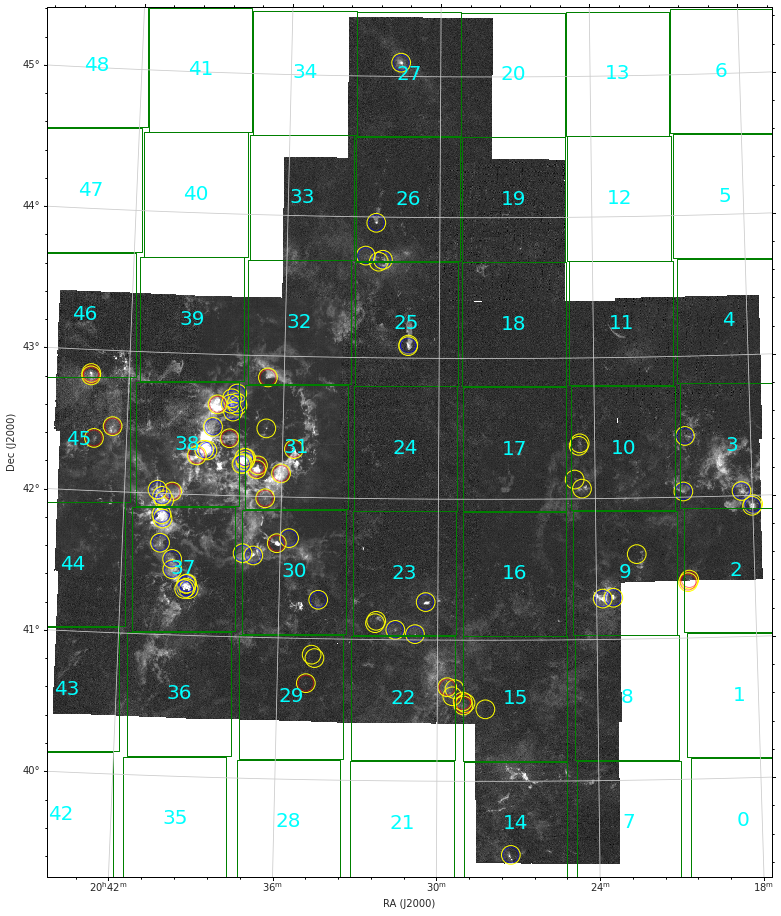

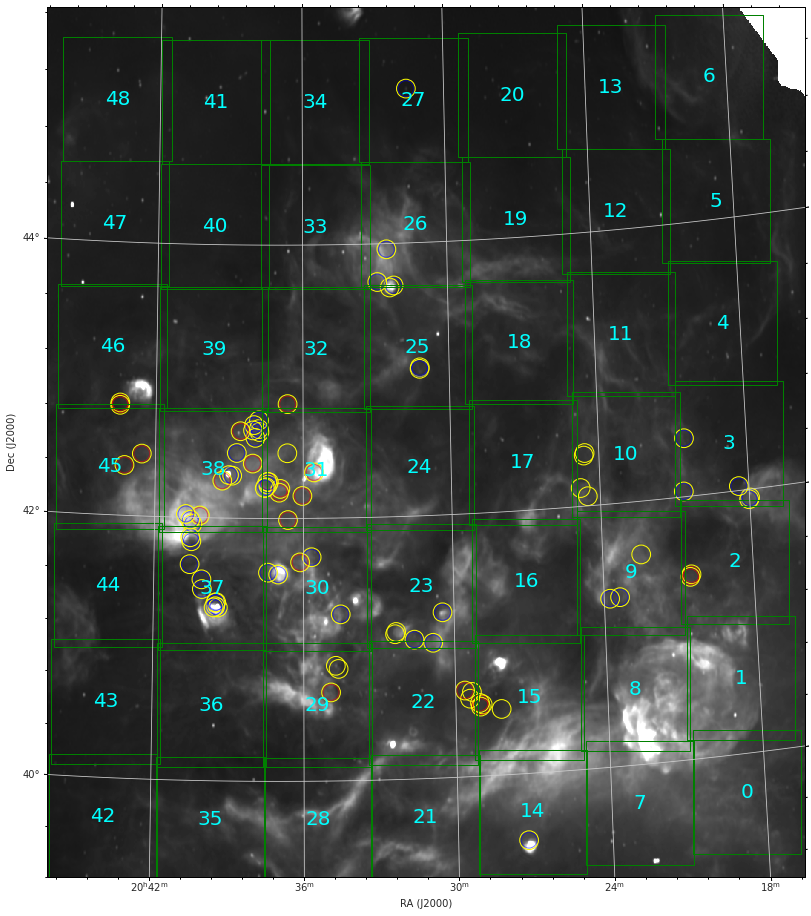

In [ ]:
####################################################################################################################################################################################################################################################
###  >>>>> ML REGRESSION MODEL OF protostar number DENSITY ON MEAN CO and 21cm 
# >>> INTENSITY AND MEAN 21-CM RADIO CONTINUUM INTENSITY PER UNIT AREA GRID <<<<<<
# >>>>>>>>>>>>>>>> TEST CODES <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 
from astropy.nddata import Cutout2D
from numpy import meshgrid
## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
# This is new, it will allow us to interact with 3d plots in the notebook
from mpl_toolkits.mplot3d import Axes3D
## This sets the plot style to have a grid on a white background
sns.set_style("whitegrid")
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore', category=UserWarning, append=True)

outflows = cygx_combined_out
N = 7
xmin = co.world_extrema[0][0] # 304.157172*u.deg
xmax = co.world_extrema[0][1] #311.481944*u.deg
ymin = co.world_extrema[1][0] #39.256583*u.deg 
ymax = co.world_extrema[1][1] #45.458596*u.deg
dx = np.abs(xmax - xmin) / N
dy = np.abs(ymax - ymin) / N

co_mean = np.zeros(N**2) *u.K * u.km / u.s
c21_mean = np.zeros(N**2) * u.K
n_of = np.zeros(N**2)
n_proto_0 = np.zeros(N**2)
n_proto_1 = np.zeros(N**2)
counter = 0
k = 0
w0 = co.shape[2]/N # this is because cubes have vel, y/Dec, x/RA data in this order
h0 = co.shape[1]/N

w0_21cm = cygx21cm.shape[2]/N # this is because cubes have vel, y/Dec, x/RA data in this order
h0_21cm = cygx21cm.shape[1]/N

f = aplpy.FITSFigure(co_mom0.hdu,figsize=(18, 16))
f.show_grayscale()

g = aplpy.FITSFigure(cygx21cm.hdu,figsize=(18, 16))
g.show_grayscale()

# >>>>>> this part for displaying outflows and sf regions >>>>>>>>>>>>>>>>>>
cdelt = utils.proj_plane_pixel_scales(co.wcs)
dv = cdelt[2]*1e-6*u.km/u.s
vlo1 = - 8.0*u.km/u.s # low negative velocity range: -8 =< v < 0
vhi1 = 1*u.km/u.s
# high positive velocity range: v > 8
vlo3 = 7*u.km/u.s + dv
vhi3 = 30*u.km/u.s
# >>>>>>>>>>>>>>>> plot outflows >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
for z in range(0,len(outflows)):
    if (outflows.loc[z].Vc >= vlo1.value) and (outflows.loc[z].Vc <= vhi1.value): # low negative range
        f.show_markers(outflows.loc[z]['RAJ2000'], outflows.loc[z]['DecJ2000'], 
                       edgecolor='blue', facecolor='none',marker='o', s=250, alpha=0.5)
        g.show_markers(outflows.loc[z]['RAJ2000'], outflows.loc[z]['DecJ2000'], 
                       edgecolor='blue', facecolor='none',marker='o', s=250, alpha=0.5)
        
        #f.scatter(outflows[z]['RAJ2000'], outflows[z]['DecJ2000'],transform=ax.get_transform('world'), 
          #         marker='o',s=700,edgecolor='blue',facecolor='none',label='Low-negative velocity')
    
    if (outflows.loc[z]['Vc'] >= vlo3.value) and (outflows.loc[z]['Vc'] <= vhi3.value): # high positive range 
        f.show_markers(outflows.loc[z]['RAJ2000'], outflows.loc[z]['DecJ2000'], 
                       edgecolor='red', facecolor='none',marker='o', s=250, alpha=0.5)
        g.show_markers(outflows.loc[z]['RAJ2000'], outflows.loc[z]['DecJ2000'], 
                       edgecolor='red', facecolor='none',marker='o', s=250, alpha=0.5)        
    else:
        pass 
    f.show_markers(outflows.loc[z]['RAJ2000'], outflows.loc[z]['DecJ2000'], 
                       edgecolor='yellow', facecolor='none',marker='o', s=350, alpha=1)
    g.show_markers(outflows.loc[z]['RAJ2000'], outflows.loc[z]['DecJ2000'], 
                       edgecolor='yellow', facecolor='none',marker='o', s=350, alpha=1)
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


for i in range(N):
    
    for j in range(N):
        
        # TASK1: this extracts pixels based on 12co cube coordinates and slices segments from 12co map 

        lon_range = [xmin+i*dx, xmin+(i+1)*dx]
        lat_range = [ymin+j*dy, ymin+(j+1)*dy]
        #print(lon_range[0], lon_range[1], lat_range[0], lat_range[1])
        
        xw = (lon_range[0]+lon_range[1])/2
        yw = (lat_range[0]+lat_range[1])/2
        
        x0, y0, _ = co.wcs.wcs_world2pix(xw, yw, 0, 0)
        f.show_rectangles(x0, y0, w0, h0, angle=0, layer=False, zorder=None,
                          coords_frame='pixel', edgecolor='green')
        f.add_label(xw.value, yw.value, str(k), color='cyan', size=20)
        x0_21cm, y0_21cm, _ = cygx21cm.wcs.wcs_world2pix(xw, yw, 0, 0)
        g.show_rectangles(x0_21cm, y0_21cm, w0_21cm, h0_21cm, angle=0, layer=False, zorder=None,
                          coords_frame='pixel', edgecolor='green')
        g.add_label(xw.value, yw.value, str(k), color='cyan', size=20)
        # Create a sub_cube cutout with these coordinates
        position = (x0, y0)
        size = (w0, h0)     # pixels
        #cutout = Cutout2D(co_mom0, position, size)
        if i < 6:
          lon_range = [xmin+i*dx, xmin+(i+1)*dx]
        elif i==6:
          lon_range = [xmin+i*1.005*dx, xmin+(i+1)*0.95*dx]
        #sub_cube_co = co.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])
        #co_mean[k] =  (sub_cube_co.moment(order=0, axis=0)).mean() * u.K #* u.km/u.s
        #print(k, co_mean[k])
        print('k-value=',k,'\n')

        try:
            sub_cube_co = co.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])
            subcube_mom = (np.expand_dims(sub_cube_co.moment(order=0, axis=0), axis=0)) * u.K
            #subcube_mom =(sub_cube_co.sum(axis=0)*dv)*u.K#.moment(order=0, axis=0) # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< HERE HERE HERE <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< ||||||||||||||||||||||   IndexError happening here but WHY ????????????????
            print('non nan pixel')
            print(subcube_mom) # <<<<<<<< should not be all NaN for k=22
            co_mean[k] = np.nanmean(subcube_mom[~np.isnan(subcube_mom)])
        except IndexError:
             print('nan pixel')
          
             co_mean[k] = np.nan
                
        # TASK2: this extracts pixels based on 21cm coordinates and slices segments from 21cm map  
        sub_cube_c21 = cygx21cm.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])
        c21_mean[k] = (sub_cube_c21.mean(axis=(1,2)))[0] * u.K 
        #print(c21_mean[k])
        #print('.......................') 

        # TASK3: count outflows in these 25 coordinate segments >>> use a boolean statement if coordinates from output_jcmt list belongs to each segment, counter[k]=counter[k]+1 >> NOTE: does not count for OFs at .65 kpc
        for z in range(0,len(outflows)):
            s1 = (outflows.loc[z]['RAJ2000']*u.deg > xmin+(i*dx)) & (outflows.loc[z]['RAJ2000']*u.deg < xmin+((i+1)*dx))
            s2 = (outflows.loc[z]['DecJ2000']*u.deg > ymin+(j*dy)) & (outflows.loc[z]['DecJ2000']*u.deg < ymin+((j+1)*dy))
            #s3 = (outflows.loc[z]['Distance'] != 0.65)
            if (s1 and s2) == True: # and s3
            # selected outflow coordinates fall in the range of fieldN.fits under consideration
                n_of[k] +=1
            else:
                pass
            
        # TASK4: count class 0protostars in these segments >>> use a boolean statement 
        for z in range(0,len(proto_0)):
            s1 = (proto_0['ra'][z]*u.deg > xmin+i*dx) & (proto_0['ra'][z]*u.deg < xmin+(i+1)*dx)
            s2 = (proto_0['dec'][z]*u.deg > ymin+j*dy) & (proto_0['dec'][z]*u.deg < ymin+(j+1)*dy)

            if (s1 and s2) == True:
            # selected outflow coordinates fall in the range of fieldN.fits under consideration
                n_proto_0[k] +=1
            else:
                pass            
        # TASK5: count class 1 protostars in these segments >>> use a boolean statement 
        for z in range(0,len(proto_1)):
            s1 = (proto_1['ra'][z]*u.deg > xmin+i*dx) & (proto_1['ra'][z]*u.deg < xmin+(i+1)*dx)
            s2 = (proto_1['dec'][z]*u.deg > ymin+j*dy) & (proto_1['dec'][z]*u.deg < ymin+(j+1)*dy)

            if (s1 and s2) == True:
            # selected outflow coordinates fall in the range of fieldN.fits under consideration
                n_proto_1[k] +=1
            else:
                pass  

        k +=1
        #if k==23:
          #break



f.save('co_grids.pdf')
g.save('21cm_grids.pdf')    
print(counter)
print('co mean values:',co_mean)
print('21-cm mean values:',c21_mean)
print('outflow numbers in segments:', n_of, '\n Total number of outflows=', n_of.sum())
print('Class 0 protostar numbers in segments:', n_proto_0, '\n Total number of class 0 protostar =', n_proto_0.sum())
print('Class 1 protostar numbers in segments:', n_proto_1, '\n Total number of class 0 protostar =', n_proto_1.sum())


In [ ]:
co_mean = np.zeros(N**2) *u.K * u.km / u.s
k = 0
for i in range(N):

    for j in range(N):
        print(i,j)
        
        # TASK1: this extracts pixels based on 12co cube coordinates and slices segments from 12co map       
        lon_range = [xmin+i*dx, xmin+(i+1)*dx]
        lat_range = [ymin+j*dy, ymin+(j+1)*dy]
        #print(lon_range[0], lon_range[1], lat_range[0], lat_range[1])
        
        xw = (lon_range[0]+lon_range[1])/2
        yw = (lat_range[0]+lat_range[1])/2
        
        x0, y0, _ = co.wcs.wcs_world2pix(xw, yw, 0, 0)
        f.show_rectangles(x0, y0, w0, h0, angle=0, layer=False, zorder=None,
                          coords_frame='pixel', edgecolor='green')
        
        x0_21cm, y0_21cm, _ = cygx21cm.wcs.wcs_world2pix(xw, yw, 0, 0)
        g.show_rectangles(x0_21cm, y0_21cm, w0_21cm, h0_21cm, angle=0, layer=False, zorder=None,
                          coords_frame='pixel', edgecolor='green')
        
        # Create a sub_cube cutout with these coordinates
        position = (x0, y0)
        size = (w0, h0)     # pixels
        #cutout = Cutout2D(co_mom0, position, size)
        
        #sub_cube_co = co.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])
        #co_mean[k] =  (sub_cube_co.moment(order=0, axis=0)).mean() * u.K #* u.km/u.s
        #print(k, co_mean[k])
        try:
            sub_cube_co = co.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])
            subcube_mom = sub_cube_co.moment(order=0, axis=0)
            s1 = subcube_mom[pd.notnull(subcube_mom)]
            co_mean[k] = (s1.sum(axis=0)).mean() * u.K #* u.km/u.s
            #co_mean[k] =  np.nanmean((sub_cube_co.moment(order=0, axis=0)).value) * u.K * u.km/u.s
        except IndexError:
             co_mean[k] = np.nan
             print(i,j,k, co_mean[k])
             #break
             
        k +=1



0 0
0 0 0 nan K km / s
0 1
0 2
0 3
0 4
1 0
1 0 5 nan K km / s
1 1
1 2
1 3
1 4
2 0
2 0 10 nan K km / s
2 1
2 2
2 3
2 4
3 0
3 0 15 nan K km / s
3 1
3 2
3 3
3 4
4 0
4 0 20 nan K km / s
4 1
4 1 21 nan K km / s
4 2
4 2 22 nan K km / s
4 3
4 3 23 nan K km / s
4 4


In [ ]:
co_mean

<Quantity [           nan, 8.58503828e+04, 1.10366188e+06, 8.86666094e+04,
           0.00000000e+00,            nan, 7.52959375e+05, 3.74751375e+05,
           1.41866828e+05, 1.42332361e+03,            nan, 1.13232238e+06,
           2.12306359e+05, 8.57598250e+05, 2.92141281e+05,            nan,
           1.42161550e+06, 4.33857150e+06, 5.45959250e+05, 1.55781172e+04,
                      nan,            nan,            nan,            nan,
           0.00000000e+00] K km / s>

In [ ]:
#.sort_values('outflow_number', ascending=False)


In [ ]:
of_proto_co = pd.DataFrame({'12CO(K km/s)':co_mean, '21cm(K)': c21_mean, 'outflow_number':n_of, 'class0_protostar_number':n_proto_0, 'class1_protostar_number':n_proto_1})
of_proto_co.to_csv(filepath + '/data/co+21cm49.csv')
of_proto_co.sort_values('outflow_number', ascending=False)

,12CO(K km/s),21cm(K),outflow_number,class0_protostar_number,class1_protostar_number
38,17.986933,25.364428,17.0,16.0,202.0
37,8.898359,18.824352,10.0,17.0,74.0
31,9.217491,21.756325,10.0,5.0,88.0
30,5.882566,21.594070,5.0,10.0,93.0
23,1.999865,18.295208,5.0,9.0,57.0
3,6.872768,12.604801,5.0,2.0,8.0
10,1.994775,15.061070,4.0,2.0,34.0
15,3.225581,23.003414,4.0,14.0,93.0
22,6.139794,17.214018,3.0,19.0,128.0
29,1.463250,17.748304,3.0,6.0,29.0


In [ ]:
outflows_df = pd.read_csv(filepath + '/data/co+21cm49.csv').drop('Unnamed: 0', axis=1)
outflows_df

,12CO(K km/s),21cm(K),outflow_number,class0_protostar_number,class1_protostar_number
0,NaN,18.298695,0.0,2.0,31.0
1,NaN,23.062265,0.0,6.0,13.0
2,1.257737,14.927852,2.0,2.0,24.0
3,6.872768,12.604801,5.0,2.0,8.0
4,0.616750,10.279692,0.0,0.0,0.0
5,NaN,9.581038,0.0,0.0,0.0
6,NaN,10.988778,0.0,0.0,0.0
7,NaN,22.612419,0.0,6.0,41.0
8,1.856782,29.544397,0.0,4.0,18.0
9,3.551901,19.648626,3.0,4.0,28.0
